In [236]:
import pandas as pd
import numpy as np
import seaborn as sns

# Categorical features are generally divided into 3 types:

### A. Binary: Either/or

Examples:

| `Yes`  | `No`    |
| ------ | ------- |
| `True` | `False` |

### B. Ordinal: Specific ordered Groups.

Examples:
| `low` | `medium` | `high` |
|-----------|-----------|-----------|
| `cold` | `hot` | `lava` | `Hot` |

### C. Nominal: Unordered Groups.

Examples:
| `cat` | `dog` | `tiger` |
|-----------|-----------|-----------|
| `pizza` | `burger` | `coke` |


In [237]:
df = pd.read_csv("Encoding Data.csv")

In [238]:
df.head(10)

,id,bin_1,bin_2,nom_0,ord_2
0,0,F,N,Red,Hot
1,1,F,Y,Blue,Warm
2,2,F,N,Blue,Cold
3,3,F,N,Green,Warm
4,4,T,N,Red,Cold
5,5,T,N,Green,Hot
6,6,F,N,Red,Cold
7,7,T,N,Red,Cold
8,8,F,N,Blue,Warm
9,9,F,Y,Red,Hot


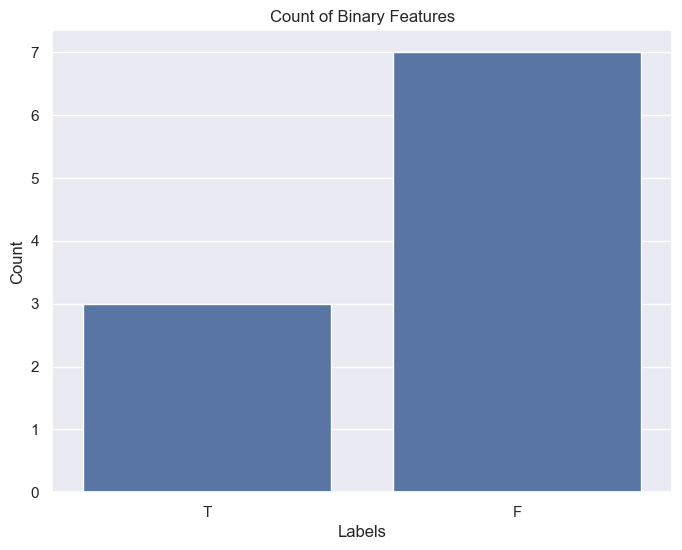

In [239]:
import matplotlib.pyplot as plt

# you can always use simple mapping on binary features.
# Simple mapping using a dictionary
mapping = {'T': 1, 'F': 0}
df_bin1_plotting = df['bin_1'].map(mapping)

# Plotting
plt.figure(figsize=(8, 6))
sns.countplot(x=df['bin_1'], order=['T', 'F'])
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Count of Binary Features')
plt.show()


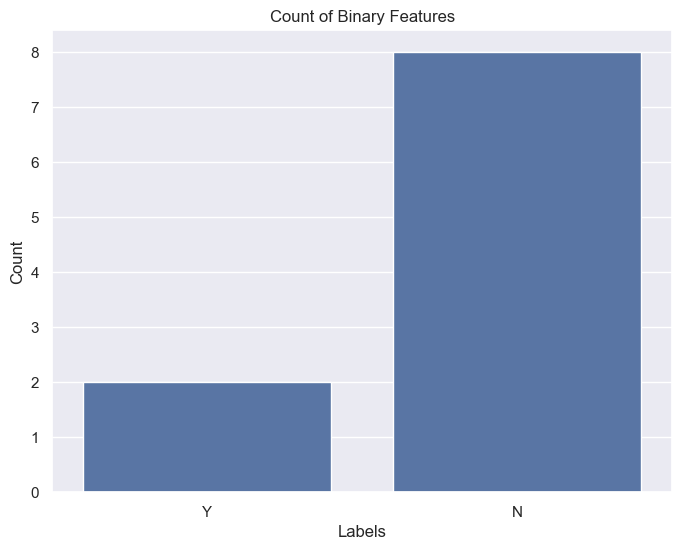

In [240]:
# df_bin2_plotting = df['bin_2'].apply(
# 	lambda x: 1 if x == 'Y' else (0 if x == 'N' else None))

# print(df_bin2_plotting.head(10))

# sns.countplot(df_bin2_plotting)

# you can always use simple mapping on binary features.
# Simple mapping using a dictionary
mapping = {'Y': 1, 'N': 0}
df_bin2_plotting = df['bin_2'].map(mapping)

# Plotting
plt.figure(figsize=(8, 6))
sns.countplot(x=df['bin_2'], order=['Y', 'N'])
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Count of Binary Features')
plt.show()

Original DataFrame:
   id bin_1 bin_2  nom_0 ord_2
0   0     F     N    Red   Hot
1   1     F     Y   Blue  Warm
2   2     F     N   Blue  Cold
3   3     F     N  Green  Warm
4   4     T     N    Red  Cold
5   5     T     N  Green   Hot
6   6     F     N    Red  Cold
7   7     T     N    Red  Cold
8   8     F     N   Blue  Warm
9   9     F     Y    Red   Hot

Mapped DataFrame:
   id bin_1 bin_2  nom_0 ord_2  ord_2_mapped
0   0     F     N    Red   Hot             0
1   1     F     Y   Blue  Warm             1
2   2     F     N   Blue  Cold             2
3   3     F     N  Green  Warm             1
4   4     T     N    Red  Cold             2
5   5     T     N  Green   Hot             0
6   6     F     N    Red  Cold             2
7   7     T     N    Red  Cold             2
8   8     F     N   Blue  Warm             1
9   9     F     Y    Red   Hot             0


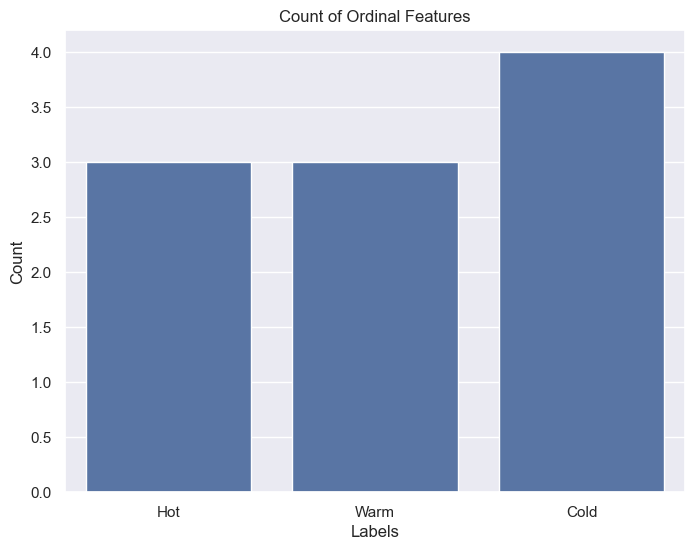

In [241]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame
# df = pd.DataFrame({
#     'ord_2': ['Hot', 'Warm', 'Cold', 'Hot', 'Cold', 'Warm', 'Hot', 'Cold', 'Warm', 'Hot']
# })

# Inspect the DataFrame to ensure it has the expected values
print("Original DataFrame:")
print(df)

# Mapping ordinal values
mapping = {"Hot": 0, "Warm": 1, "Cold": 2}
df['ord_2_mapped'] = df['ord_2'].map(mapping)

# Inspect the mapped values to ensure the mapping is correct
print("\nMapped DataFrame:")
print(df)

sns.set_theme(style='darkgrid')

# Plotting
plt.figure(figsize=(8, 6))
sns.countplot(x='ord_2', data=df, order=["Hot", "Warm", "Cold"])
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Count of Ordinal Features')
plt.show()



### One Hot encoding with sklearn


In [242]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
# transforming the column after fitting
enc = enc.fit_transform(df[['nom_0']]).toarray()
# converting arrays to a dataframe
encoded_colm = pd.DataFrame(enc)
# concatenating dataframes
df_onehot = pd.concat([df, encoded_colm], axis=1)
# removing the encoded column.
df_onehot.head(10)


,id,bin_1,bin_2,nom_0,ord_2,ord_2_mapped,0,1,2
0,0,F,N,Red,Hot,0,0.0,0.0,1.0
1,1,F,Y,Blue,Warm,1,1.0,0.0,0.0
2,2,F,N,Blue,Cold,2,1.0,0.0,0.0
3,3,F,N,Green,Warm,1,0.0,1.0,0.0
4,4,T,N,Red,Cold,2,0.0,0.0,1.0
5,5,T,N,Green,Hot,0,0.0,1.0,0.0
6,6,F,N,Red,Cold,2,0.0,0.0,1.0
7,7,T,N,Red,Cold,2,0.0,0.0,1.0
8,8,F,N,Blue,Warm,1,1.0,0.0,0.0
9,9,F,Y,Red,Hot,0,0.0,0.0,1.0


### One hot encoding with pandas


In [243]:
df_onhot_pd = pd.get_dummies(df, prefix=['nom_0'], columns=['nom_0'])
df_onhot_pd.head(10)



,id,bin_1,bin_2,ord_2,ord_2_mapped,nom_0_Blue,nom_0_Green,nom_0_Red
0,0,F,N,Hot,0,False,False,True
1,1,F,Y,Warm,1,True,False,False
2,2,F,N,Cold,2,True,False,False
3,3,F,N,Warm,1,False,True,False
4,4,T,N,Cold,2,False,False,True
5,5,T,N,Hot,0,False,True,False
6,6,F,N,Cold,2,False,False,True
7,7,T,N,Cold,2,False,False,True
8,8,F,N,Warm,1,True,False,False
9,9,F,Y,Hot,0,False,False,True


### Frequency Encoding


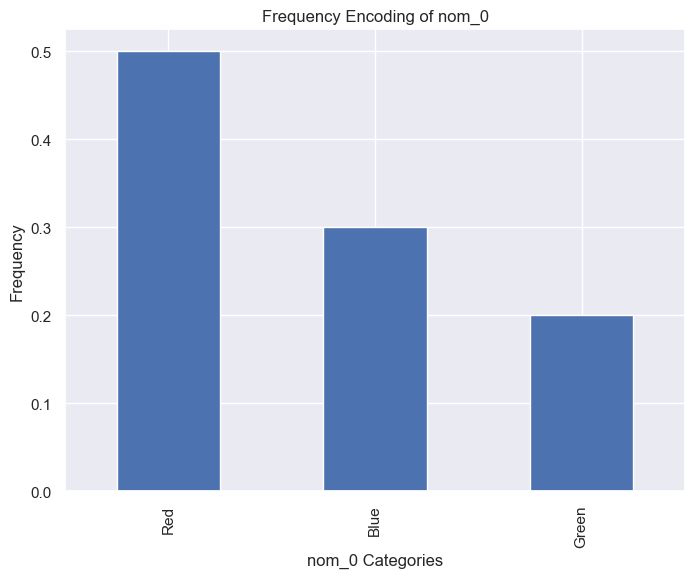

   id bin_1 bin_2  nom_0 ord_2  ord_2_mapped  nom_0_freq_encode
0   0     F     N    Red   Hot             0                0.5
1   1     F     Y   Blue  Warm             1                0.3
2   2     F     N   Blue  Cold             2                0.3
3   3     F     N  Green  Warm             1                0.2
4   4     T     N    Red  Cold             2                0.5
5   5     T     N  Green   Hot             0                0.2
6   6     F     N    Red  Cold             2                0.5
7   7     T     N    Red  Cold             2                0.5
8   8     F     N   Blue  Warm             1                0.3
9   9     F     Y    Red   Hot             0                0.5


In [244]:
# Group by frequency
fq = df['nom_0'].value_counts(normalize=True)

# Mapping values to the DataFrame
df['nom_0_freq_encode'] = df['nom_0'].map(fq)



# Plot the frequency encoding
plt.figure(figsize=(8, 6))
fq.plot(kind='bar', stacked=True)
plt.xlabel('nom_0 Categories')
plt.ylabel('Frequency')
plt.title('Frequency Encoding of nom_0')
plt.show()

# Display the DataFrame
print(df.head(10))


In [245]:
from sklearn.preprocessing import OrdinalEncoder
# Initialize the OrdinalEncoder
ord1 = OrdinalEncoder()

# Fitting encoder to the 'ord_2' column
ord1.fit(df[['ord_2']])

# Transforming the column after fitting
df_orden = ord1.transform(df[['ord_2']])

# Display the DataFrame
print(df_orden)

[[1.]
 [2.]
 [0.]
 [2.]
 [0.]
 [1.]
 [0.]
 [0.]
 [2.]
 [1.]]
